In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
afs=[]
inputFile=open("af.tsv")
inputFile.readline()
for l in inputFile:
    vid,af1,af2=l.strip().split(" ")
    afs.append((float(af1),float(af2)))
len(afs)


17873011

In [19]:
Assemblies_af = np.array(sorted([x[1] for x in afs]))
pangenie_af = np.array(sorted([x[0] for x in afs]))
difference_af= np.array([x[1] - x[0] for x in afs])

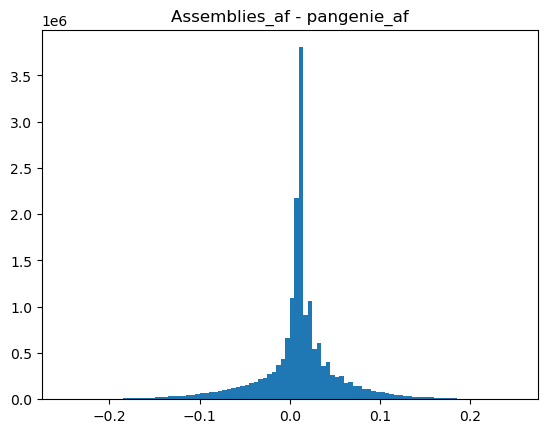

In [39]:
data_1=difference_af[difference_af>=-0.25]
data_1 = data_1[data_1<=0.25]
data = [data_1]
plt.hist(data, bins=100)
plt.title("Assemblies_af - pangenie_af")
plt.show()

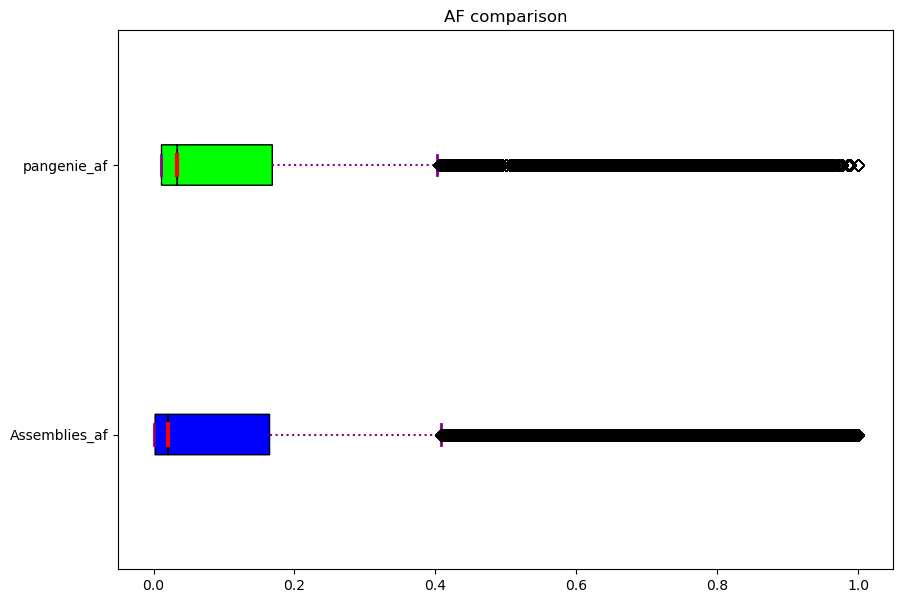

In [13]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot([pangenie_af,Assemblies_af], patch_artist = True,
				notch ='True', vert = 0)

colors = ['#0000FF', '#00FF00',
		'#FFFF00', '#FF00FF']

for patch, color in zip(bp['boxes'], colors):
	patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
	whisker.set(color ='#8B008B',
				linewidth = 1.5,
				linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
	cap.set(color ='#8B008B',
			linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
	median.set(color ='red',
			linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
	flier.set(marker ='D',
			color ='#e7298a',
			alpha = 0.5)
	
# x-axis labels
ax.set_yticklabels(['Assemblies_af', 'pangenie_af'])

# Adding title
plt.title("AF comparison")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
	
# show plot
plt.show()


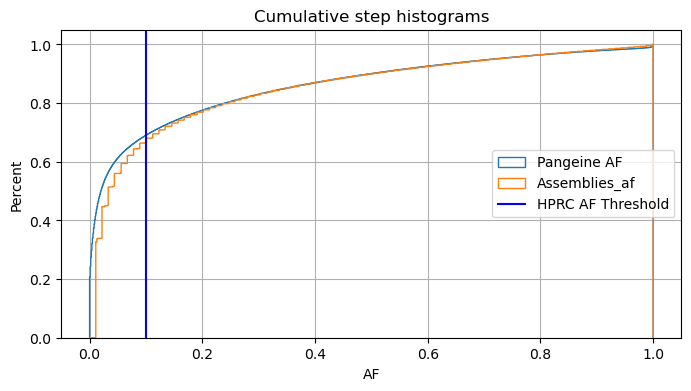

In [28]:
n_bins = 1000
fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(pangenie_af, n_bins, density=True, histtype='step',
                           cumulative=True, label='Pangeine AF')


# Overlay a reversed cumulative histogram.
ax.hist(Assemblies_af, bins=bins, density=True, histtype='step',
        label="Assemblies_af",cumulative=True)

plt.axvline(x = 0.1, color = 'b', label = 'HPRC AF Threshold')
# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('AF')
ax.set_ylabel('Percent')

plt.show()

The graph is showing that Assemblies AF are underestimating and that's why they used 0.1 af threshold. with pangenie we can use theshold 0.05

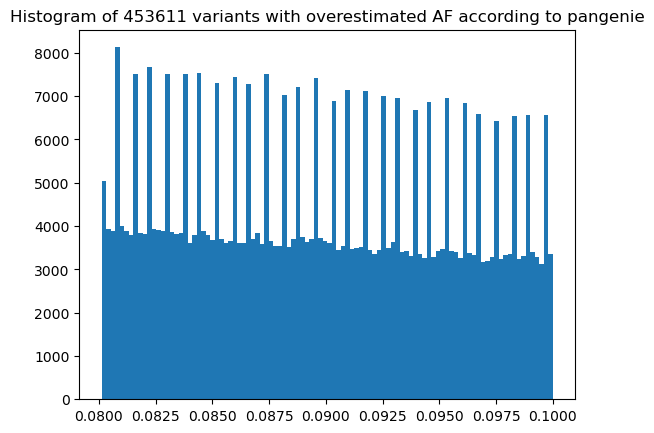

In [45]:
data_1=pangenie_af[Assemblies_af>=0.1]
data_1 = data_1[data_1<=0.1]
data = [data_1]
plt.hist(data, bins=100)
plt.title("Histogram of %d variants with overestimated AF according to pangenie" % (len(data_1) ))
plt.show()

In [46]:
print(sum(Assemblies_af>=0.1))

6000635
